<a href="https://colab.research.google.com/github/gvlokesh/object_detection/blob/master/Object_detection_for_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Setting up google object detection API

%cd
  
!git clone --quiet https://github.com/tensorflow/models.git

!apt-get install -qq protobuf-compiler python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive

!pip install -q pycocotools

%cd ~/models/research
!protoc object_detection/protos/*.proto --python_out=.

#Setting up the path

import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/'
#Donloading COCO API
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI
!cp -r cocoapi/PythonAPI/pycocotools .
#Making sure everything is setup as expected
!python object_detection/builders/model_builder_test.py
!pwd
#under root -perform the following
%mkdir workspace
%cd workspace
%mkdir training_demo
%cd training_demo
%mkdir annotations
%mkdir images
%mkdir pre-trained-model
%mkdir training
%cd images
%mkdir test
%mkdir train

/root
    100% |████████████████████████████████| 993kB 21.3MB/s 
/root/models/research


TensorFlow requires a label map, which namely maps each of the used labels to an integer values. This label map is used both by the training and detection processes.

Below I show an example label map (e.g label_map.pbtxt), assuming that our dataset containes 2 labels, dogs and cats:

item {
    id: 1
    name: 'dosa'
}

item {
    id: 2
    name: 'idli'
}


Label map files have the extention .pbtxt and should be placed inside the **training_demo\annotations **folder.

In [0]:
%cd /root

/root


In [0]:
#to store scripts we create proeprocessing folder

%mkdir scripts
%cd scripts
%mkdir preprocessing

/root/scripts




---



---


**XML TO CSV **


---



--- 



In [0]:
#xml to csv

#upload xml_to_csv.py file in preprocessing folder and run it 

# Create train data:
!python /root/scripts/preprocessing/xml_to_csv.py -i /root/workspace/training_demo/images/train -o /root/workspace/training_demo/annotations/train_labels.csv


# Create test data:
!python /root/scripts/preprocessing/xml_to_csv.py -i /root/workspace/training_demo/images/test -o /root/workspace/training_demo/annotations/test_labels.csv




Successfully converted xml to csv.
Successfully converted xml to csv.




---



---


**CSV to TF record**


---



---



In [0]:
#csv to tfrecord

#upload generate_tfrecord.py file in preprocessing folder and run it 

!python /root/scripts/preprocessing/generate_tfrecord.py  --csv_input=/root/workspace/training_demo/annotations/train_labels.csv --image_dir=/root/workspace/training_demo/images/train  --output_path=/root/workspace/training_demo/annotations/train.record
!python /root/scripts/preprocessing/generate_tfrecord.py  --csv_input=/root/workspace/training_demo/annotations/test_labels.csv --image_dir=/root/workspace/training_demo/images/test  --output_path=/root/workspace/training_demo/annotations/test.record






Successfully created the TFRecords: /root/workspace/training_demo/annotations/train.record
Successfully created the TFRecords: /root/workspace/training_demo/annotations/test.record


In [0]:
%cd /root/workspace/training_demo/pre-trained-model

/root/workspace/training_demo/pre-trained-model




---



---


**SSD Inception Coco trainset download**

---



---



In [0]:
!wget http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2018_01_28.tar.gz

--2019-03-03 07:18:32--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.206.128, 2a00:1450:400c:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.206.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278114232 (265M) [application/x-tar]
Saving to: ‘ssd_inception_v2_coco_2018_01_28.tar.gz’

ssd_inception_v2_co 100%[===================>] 265.23M  66.3MB/s    in 4.0s    

2019-03-03 07:18:36 (66.3 MB/s) - ‘ssd_inception_v2_coco_2018_01_28.tar.gz’ saved [278114232/278114232]



In [0]:
!gunzip --k ssd_inception_v2_coco_2018_01_28.tar.gz

In [0]:
!ls

ssd_inception_v2_coco_2018_01_28.tar.gz  ssd_inception_v2.tar


In [0]:
!mv ssd_inception_v2_coco_2018_01_28.tar ssd_inception_v2.tar

In [0]:
!cp /root/models/research/object_detection/legacy/train.py /root/workspace/training_demo

In [0]:
%cd /root/workspace/training_demo/

/root/workspace/training_demo




---



---

**TRAINING**


---



---



In [0]:
!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_inception_v2_coco.config

INFO:tensorflow:global step 19992: loss = 3.4931 (1.059 sec/step)
INFO:tensorflow:global step 19992: loss = 3.4931 (1.059 sec/step)
INFO:tensorflow:global step 19993: loss = 1.2236 (0.608 sec/step)
INFO:tensorflow:global step 19993: loss = 1.2236 (0.608 sec/step)
INFO:tensorflow:global step 19994: loss = 1.9522 (0.713 sec/step)
INFO:tensorflow:global step 19994: loss = 1.9522 (0.713 sec/step)
INFO:tensorflow:global step 19995: loss = 1.1198 (0.654 sec/step)
INFO:tensorflow:global step 19995: loss = 1.1198 (0.654 sec/step)
INFO:tensorflow:global step 19996: loss = 1.1836 (0.582 sec/step)
INFO:tensorflow:global step 19996: loss = 1.1836 (0.582 sec/step)
INFO:tensorflow:global step 19997: loss = 1.2797 (0.582 sec/step)
INFO:tensorflow:global step 19997: loss = 1.2797 (0.582 sec/step)
INFO:tensorflow:global step 19998: loss = 1.9356 (0.665 sec/step)
INFO:tensorflow:global step 19998: loss = 1.9356 (0.665 sec/step)
INFO:tensorflow:global step 19999: loss = 1.5942 (0.499 sec/step)
INFO:tenso

In [0]:
%cd /root/workspace/
%mkdir inference

/root/workspace


In [0]:
%cd inference

/root/workspace/inference


In [0]:
!python /root//models/research/object_detection/export_inference_graph.py --input_type image_tensor --pipeline_config_path /root/workspace/training_demo/training/ssd_inception_v2_coco.config --trained_checkpoint_prefix /root/workspace/training_demo/training/model.ckpt-19769 --output_directory /root/workspace/inference/idli_inference_graph_v1.pb

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
169 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              0
-min_occurrence             0
-step                       -1
-order_by                   name
-a



---



---



---


***Inference code starts now onwards***

---



---



---



---



In [0]:
%cd /root/models/research/object_detection
# Import packages
import os
import cv2
import numpy as np
import tensorflow as tf
import sys

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


/root/models/research/object_detection


In [0]:
# This is needed to display the images.
%matplotlib inline

In [0]:
!mkdir idli

mkdir: cannot create directory ‘idli’: File exists


In [0]:
%cd idli

/root/models/research/object_detection/idli


In [0]:
%mkdir  variables


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving checkpoint to checkpoint
Saving frozen_inference_graph.pb to frozen_inference_graph.pb
Saving model.ckpt.data-00000-of-00001 to model.ckpt.data-00000-of-00001
Saving model.ckpt.index to model.ckpt.index
Saving model.ckpt.meta to model.ckpt.meta
Saving pipeline.config to pipeline.config
User uploaded file "checkpoint" with length 77 bytes
User uploaded file "frozen_inference_graph.pb" with length 53963835 bytes
User uploaded file "model.ckpt.data-00000-of-00001" with length 53367044 bytes
User uploaded file "model.ckpt.index" with length 18043 bytes
User uploaded file "model.ckpt.meta" with length 1594999 bytes
User uploaded file "pipeline.config" with length 4124 bytes


In [0]:
# What model to download.
MODEL_NAME = 'idli'
# MODEL_FILE = MODEL_NAME + '.tar.gz'
# DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

PATH='/root/models/research/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = PATH+'idli/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/root/models/research/object_detection/idli/label_map.pbtxt'

In [0]:
print(PATH_TO_FROZEN_GRAPH,'/n',PATH_TO_LABELS)

/root/models/research/object_detection/idli/frozen_inference_graph.pb /n /root/models/research/object_detection/idli/label_map.pbtxt


In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
     
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [0]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

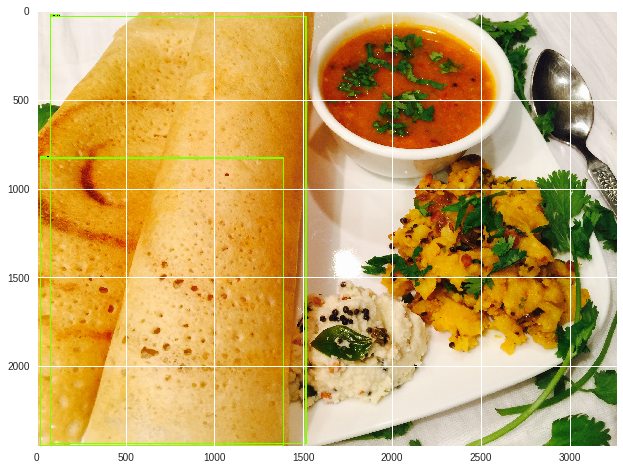

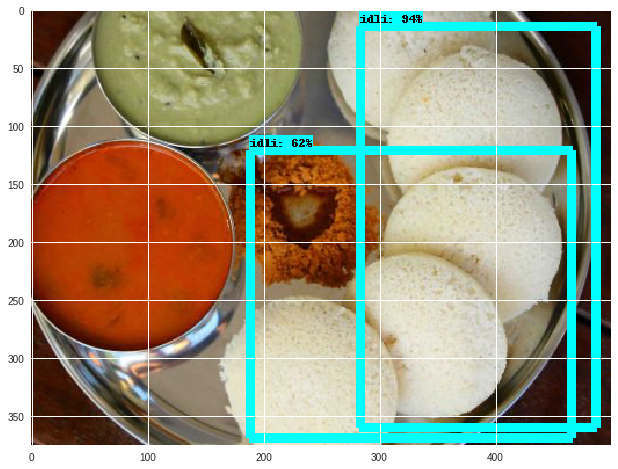

In [0]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      np.squeeze(output_dict['detection_boxes']),
      np.squeeze(output_dict['detection_classes']),
      np.squeeze(output_dict['detection_scores']),
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)